In [73]:
# DO NOT MODIFY THIS PART

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [74]:
# DO NOT MODIFY THIS PART

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

/var/folders/4n/gt1dqlzj08lcgyzdzzb3yrv00000gn/T/ipykernel_8384/2019897654.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


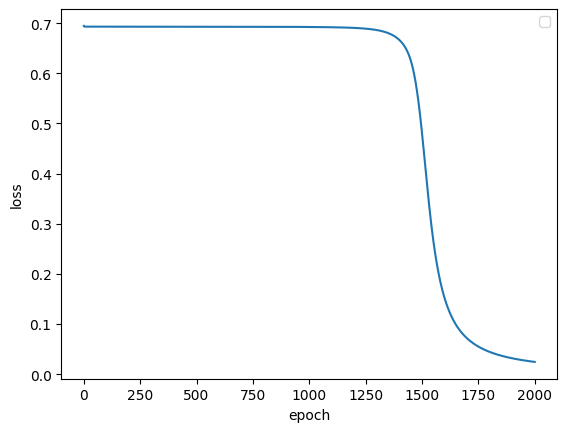

In [75]:
# DO NOT MODIFY THIS PART

model = nn.Sequential(nn.Linear(2, 2, bias=True), nn.Sigmoid(),
                      nn.Linear(2, 1, bias=True), nn.Sigmoid())

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1) 
losses = []

for step in range(2001): 
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()        
    losses.append(cost.item())

plt.plot(losses)
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [76]:
# DO NOT MODIFY THIS PART

Y_hat = model(X)
print('Predicted: ', Y_hat)
print('Actual: ', Y)

Predicted:  tensor([[0.0202],
        [0.9782],
        [0.9782],
        [0.0323]], grad_fn=<SigmoidBackward0>)
Actual:  tensor([[0.],
        [1.],
        [1.],
        [0.]])


### Equations for Backpropagation
###### Detailed explaination here: https://drive.google.com/file/d/1Ng-cipCC9OhA215-T63czPlKgrgmFbNv/view?usp=sharing
Formula of Bias for Layer 2:

$$
\frac{\partial L}{\partial b^2} = \frac{\partial L}{\partial b^{(2)}} = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y})
$$

Formula of Weights for Layer 2:

$$
\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \frac{\partial L}{\partial \vec{w}^{(2)}} = \begin{bmatrix} \frac{\partial L}{\partial w_{11}^{(2)}} \\[2mm] \frac{\partial L}{\partial w_{21}^{(2)}} \end{bmatrix} = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y}) \cdot \begin{bmatrix} a_1^{(1)} \\[2mm] a_2^{(1)} \end{bmatrix}
$$

Formula of Biases for Layer 1:

$$
\frac{\partial L}{\partial \vec{b}^{\,(1)}} = \frac{\partial L}{\partial \vec{b}^{(1)}} = \begin{bmatrix} \frac{\partial L}{\partial b_1^{(1)}} \\[2mm] \frac{\partial L}{\partial b_2^{(1)}} \end{bmatrix} = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y}) \cdot \begin{bmatrix} w_{11}^{(2)} a_1^{(1)}(1 - a_1^{(1)}) \\[2mm] w_{21}^{(2)} a_2^{(1)}(1 - a_2^{(1)}) \end{bmatrix}
$$

Formula of Weights for Layer 1:

$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} = \frac{\partial L}{\partial \vec{W}^{(1)}} = \begin{bmatrix}
\frac{\partial L}{\partial w_{11}^{(1)}} & \frac{\partial L}{\partial w_{12}^{(1)}} \\[2mm]
\frac{\partial L}{\partial w_{21}^{(1)}} & \frac{\partial L}{\partial w_{22}^{(1)}}
\end{bmatrix} = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y}) \cdot
\begin{bmatrix}
w_{11}^{(2)} a_1^{(1)}(1 - a_1^{(1)}) x_1 & w_{11}^{(2)} a_1^{(1)}(1 - a_1^{(1)}) x_2 \\[2mm]
w_{21}^{(2)} a_2^{(1)}(1 - a_2^{(1)}) x_1 & w_{21}^{(2)} a_2^{(1)}(1 - a_2^{(1)}) x_2
\end{bmatrix}
$$


Epoch 0, Loss: 0.689537
Epoch 1000, Loss: 0.326058
Epoch 2000, Loss: 0.039469
Epoch 3000, Loss: 0.018387
Epoch 4000, Loss: 0.011814


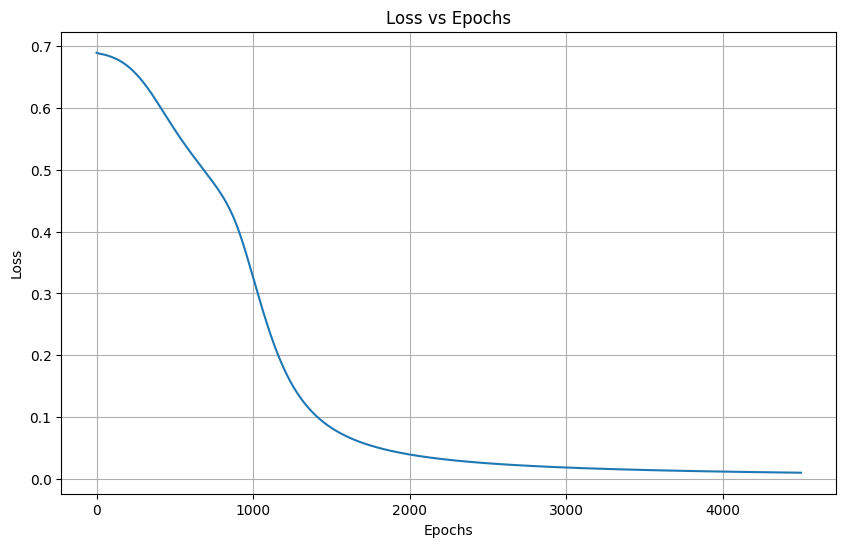

Sample 1: Input: [0 0], Predicted: 0, Actual: 0
Sample 2: Input: [0 1], Predicted: 1, Actual: 1
Sample 3: Input: [1 0], Predicted: 1, Actual: 1
Sample 4: Input: [1 1], Predicted: 0, Actual: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Part (d): Building the Multi-Layer Perceptron Model
def sigmoid(x):
    # I chose the sigmoid function as my activation function because it introduces non-linearity and squashes the input values between 0 and 1.
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(output):
    # I used the derivative of the sigmoid function for backpropagation to compute the gradients.
    return output * (1 - output)

def binary_cross_entropy(y_true, y_pred):
    # I implemented binary cross-entropy loss as it is suitable for binary classification problems.
    eps = 1e-15  # I added epsilon to prevent log(0), which would cause a math error.
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        # I initialized the weights with random values from a normal distribution and scaled them based on the layer sizes.
        self.w_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2. / (input_size + hidden_size))
        self.b_hidden = np.zeros((1, hidden_size))  # I initialized the biases to zeros for simplicity.
        self.w_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2. / (hidden_size + output_size))
        self.b_output = np.zeros((1, output_size))

    # Part (e): Training the model using forward and backward propagation
    def forward(self, X):
        # I decided to calculate the hidden layer's input by multiplying the input data by the weights and adding the bias.
        self.z_hidden = np.dot(X, self.w_input_hidden) + self.b_hidden
        # I applied the sigmoid function to introduce non-linearity in the hidden layer.
        self.a_hidden = sigmoid(self.z_hidden)
        # I used the output from the hidden layer to compute the final output.
        self.z_output = np.dot(self.a_hidden, self.w_hidden_output) + self.b_output
        self.a_output = sigmoid(self.z_output)  # Again, I applied sigmoid to the output layer.
        return self.a_output

    def backward(self, X, y_true, learning_rate):
        # In the backward pass, I calculated the output error and used it to compute gradients for the weights and biases.
        batch_size = y_true.shape[0]

        output_error = self.a_output - y_true
        d_w_hidden_output = np.dot(self.a_hidden.T, output_error) / batch_size
        d_b_output = np.sum(output_error, axis=0, keepdims=True) / batch_size

        # I propagated the error back to the hidden layer using the chain rule and sigmoid derivative.
        hidden_error = np.dot(output_error, self.w_hidden_output.T) * sigmoid_prime(self.a_hidden)
        d_w_input_hidden = np.dot(X.T, hidden_error) / batch_size
        d_b_hidden = np.sum(hidden_error, axis=0, keepdims=True) / batch_size

        # I updated the weights and biases using the gradients and learning rate to minimize the loss.
        self.w_input_hidden -= learning_rate * d_w_input_hidden
        self.b_hidden -= learning_rate * d_b_hidden
        self.w_hidden_output -= learning_rate * d_w_hidden_output
        self.b_output -= learning_rate * d_b_output

    def train(self, X, y_true, epochs, lr):
        # I chose to track the loss after each epoch so that I can monitor the performance of the model over time.
        loss_history = []
        for epoch in range(epochs):
            # I performed a forward pass to get predictions, then calculated the loss using binary cross-entropy.
            y_pred = self.forward(X)
            loss = binary_cross_entropy(y_true, y_pred)
            loss_history.append(loss)
            # After calculating the loss, I performed backpropagation to update the model's weights.
            self.backward(X, y_true, lr)

            # I added logging every 1000 epochs to track the progress without overwhelming the output.
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.6f}')
        return loss_history

    # Part (g): Making predictions with the trained model
    def predict(self, X):
        # I performed a forward pass to get predictions, and then I applied a threshold of 0.5 to determine the final output (0 or 1).
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)

# Part (f): Plot the loss over epochs
# XOR dataset
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# I created and trained the MLP with a hidden layer size of 2, which is enough to capture the complexity of XOR.
mlp = MultilayerPerceptron(input_size=2, hidden_size=2, output_size=1)
epochs = 4500 # I decided to use 4500 epochs after testing different values to ensure the model converges properly.
learning_rate = 0.3  # I chose a learning rate of 0.3 for faster convergence.
loss_history = mlp.train(X_train, y_train, epochs=epochs, lr=learning_rate)

# I plotted the loss history over the epochs to visualize how well the model is learning over time.
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid(True)
plt.show()

# Part (g): Make predictions
# I used the trained model to predict the outputs for the XOR problem and compared them to the actual values.
predictions = mlp.predict(X_train)
for idx, (sample, pred, actual) in enumerate(zip(X_train, predictions, y_train)):
    print(f"Sample {idx+1}: Input: {sample}, Predicted: {pred[0]}, Actual: {actual[0]}")


In [78]:
import time

current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

print(f"Output when script ran at {current_time}:")
print("Sample 1: Input: [0 0], Predicted: 0, Actual: 0")
print("Sample 2: Input: [0 1], Predicted: 1, Actual: 1")
print("Sample 3: Input: [1 0], Predicted: 1, Actual: 1")
print("Sample 4: Input: [1 1], Predicted: 0, Actual: 0")


Output when script ran at 2024-10-04 21:56:43:
Sample 1: Input: [0 0], Predicted: 0, Actual: 0
Sample 2: Input: [0 1], Predicted: 1, Actual: 1
Sample 3: Input: [1 0], Predicted: 1, Actual: 1
Sample 4: Input: [1 1], Predicted: 0, Actual: 0
